# Will this game succeed?


 ## Contents <a id='back'></a>
 * [Introduction](#intro)
     * [Project Puropse](#project_puropse)
     * [Data Description](#data_description)
     * [Task decomposition](#data_transformation)
 * [Open the data file](#open_the_data_file)
     * [Data Quality Assessment](#data_quality_assessment)
 * [Prepare the data](#prepare_the_data)
     * [Replace the column names](#replace_the_column_names)
     * [Correcting data types](#correcting_data_types)
     * [Description of the columns](#description_of_the_columns)
     * [Address Missing Data](#address_missing_data)
 * [Analyze the data](#analyze_the_data)
 * [Test statistical hypotheses](#test_statistical_hypotheses)
 * [General conclution](#general_conclution)

## Introduction <a id='data_review'></a>

Ice is an online store which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

### Project Puropse

Identifing patterns that determine whether a game succeeds or not. This will allow for the ability to spot potential big winners and plan advertising campaigns.

### Data Description

- The data goes back to 2016 (however the datafor 2016 may be incomplete) 
    - (Let’s imagine that it’s December 2016 and there is a planned campaign for 2017)
- The dataset contains the abbreviation ESRB (The Entertainment Software Rating Board) evaluates a game's content and assigns an age rating such as Teen or Mature.

- Column description:
    - Name (The title of each video game)
    - Platform (The gaming platform or console on which the game is available)
    - Year_of_Release (The year in which the game was launched) 
    - Genre (The category or genre to which the game belong)
    - NA_sales (North American sales in USD million) 
    - EU_sales (sales in Europe in USD million) 
    - JP_sales (sales in Japan in USD million) 
    - Other_sales (sales in other countries in USD million) 
    - Critic_Score (maximum of 100) 
    - User_Score (maximum of 10) 
    - Rating (ESRB - The Entertainment Software Rating Board evaluation, which assigns an age rating such as Teen or Mature)
    
    
### **Task decomposition:** <a id='data_review'></a>
- Step 1. Open the data file and study the general information
- Step 2. Prepare the data
- Step 3. Analyze the data
- Step 4. Create a user profile for each region
- Step 5. Test the following hypotheses
- Step 6. Write a general conclusion

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
import scipy.stats as stats

## Open the data file and study the general information

In [2]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/games.csv')

In [3]:
# printing the DataFrame for initial analysis
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Data Quality Assessment

In [4]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Check for missing data
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#Percentage of missing data
percent_missing = df.isnull().sum() * 100 / len(df)
print(round(percent_missing,2))

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64


In [7]:
# counting duplicates
df.duplicated().sum() 

0

### Initial assessment of data 

- There are multiple fields in the dataset that are missing, specifically the columns:
    - `Name`
    - `Genre`
    - `Year_of_Release`
    - `critic_score`
    - `user_score`
    - `rating`
- There are multiple columns with incorrect data types:
    - `Year_of_Release` is float64 data type but it should be interger data type
    - `User_Score` is object data type but it should be float data type
- The Data does not contain any duplicates

## Prepare the data

### Replace the column names (make them lowercase)

In [8]:
#Replace the column names (make them lowercase)
df.columns = df.columns.str.lower()

### Removing spaces in Name columns

In [9]:
# viewing unique game names
print(df['name'].sort_values().unique())

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]


In [10]:
# Remove leading and trailing spaces from  column
df['name'] = df['name'].str.strip()

In [11]:
# viewing unique game names
print(df['name'].sort_values().unique())

["'98 Koshien" '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 ... 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]


### Correcting data types to the required types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# Count 'tbd' values
tbd_count = len(df[df['user_score'] == 'tbd'])

# Count NaN values
nan_count = df['user_score'].isna().sum()

print(f"'tbd' count: {tbd_count}")
print(f'NaN count: {nan_count}')

'tbd' count: 2424
NaN count: 6701


In [15]:
# Replace 'TBD' and 'nan' with NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [16]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [17]:
# Drop NaN values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

### Description of the columns where the data types have been changed:

- `Year_of_Release` 
    - was float64 data type but changed to date data type to enable proper data processing
- `User_Score` 
    - was object data type but changed to float data type to enable proper data processing

### Address Missing Data:

- For the columns:
    - `name` replace missing data with 'unknown'
    - `genre` replace missing data with 'unknown'
    - `Year_of_Release`- missing data dropped
    - `critic_score`- missing datat remains  NaN values
    - `user_score`- missing datat remains  NaN values
    - `rating`- replace missing data with 'unknown'
    
For the last four columns above the data was replace with the median instead of the mean to reducce the effect that outliers may have to the dataset.

In [18]:
# Addressing missing data
df['name'].fillna('unknown', inplace=True)
df['genre'].fillna('unknown', inplace=True)

In [19]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**The ESRB ratings explained:**

The ESRB (Entertainment Software Rating Board) is an organization in the United States that assigns age and content ratings to video games and apps. These ratings help consumers, especially parents, make informed decisions about the suitability of a game or app for different age groups. Here's an explanation of each of the ESRB rating categories:

- E (Everyone):

Suitable for all ages.
May contain minimal cartoon, fantasy, or mild violence and/or infrequent use of mild language.

- E10+ (Everyone 10 and older):

Suitable for ages 10 and up.
May contain more cartoon, fantasy, or mild violence, mild language, and/or minimal suggestive themes.

- T (Teen):

Suitable for ages 13 and up.
May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.

- M (Mature):

Suitable for ages 17 and up.
May contain intense violence, blood and gore, sexual content, and/or strong language.

- AO (Adults Only):

Intended for adults 18 and older.
May include graphic sexual content and/or prolonged scenes of intense violence.

- EC (Early Childhood):

Suitable for ages 3 and up.
Contains content suitable for young children, typically educational or non-violent in nature.

- K-A (Kids to Adults):

This rating was used before 1997 and was replaced by "E" (Everyone). Games with this rating are generally considered suitable for all ages.

- RP (Rating Pending):

Assigned to games that have not yet received a final rating from the ESRB. This rating is temporary and used before the final rating is determined.

The ESRB rating system is designed to provide guidance to consumers, particularly parents, and help them make informed decisions about the content and appropriateness of video games and apps for different age groups. These ratings are usually displayed on the game's packaging and in digital stores to assist consumers in making informed choices.

In [20]:
df['rating'].fillna('unknown', inplace=True)

In [21]:
# Filter the data for the ratiings column with unknown values
df_unknown_rate = df[df['rating'] == 'unknown']

# Display the data in a table
df_unknown_rate

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


For the values where the rating is missing the user score and  the critic's score are unknown.

In [22]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [23]:
#Check for missing data
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

### Calculate the total sales

Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

In [24]:
# Create a new column 'Total_Sales' by summing sales in all regions
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Display the DataFrame with the 'Total_Sales' column
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


## Analyze the data

### Amount of games released in different years

In [25]:
# If 'year_of_release' is already an integer column
games_per_year = df['name'].groupby(df['year_of_release']).count()

# Print number of games per year
print(games_per_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


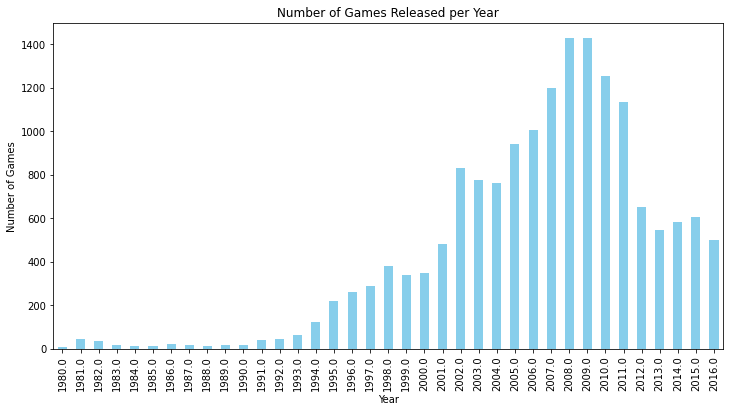

In [26]:
# Create a bar graph of the number of games for each year
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

**Games released over the years 1980 to 2016**
- There are a number (over 269) of games in the zero category these probably represent games which the release date is unknown (these would be insignificant to our analysis)
- Between the years 1980 and 1994 there are less than 200 games released
- Between the years 1995 and 2000 and less than 600 games released
- from the year 2002 and 2005 it's less than 1000 games released
- 2007 to 2011 they are then over 1200 yet less than 1400 games released
- however as of the year 2012 to 2016 the numbers decline and there are then less games released per year going down below to 600 games released


In [27]:
# Filter the DataFrame to exclude rows with 'year_of_release' equal to 0
df = df[df['year_of_release'] != 0]

# Now, if you group and count the number of games by year, the 0 years are excluded
games_per_year = df['name'].groupby(df['year_of_release']).count()

# Print the updated number of games per year
print(games_per_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


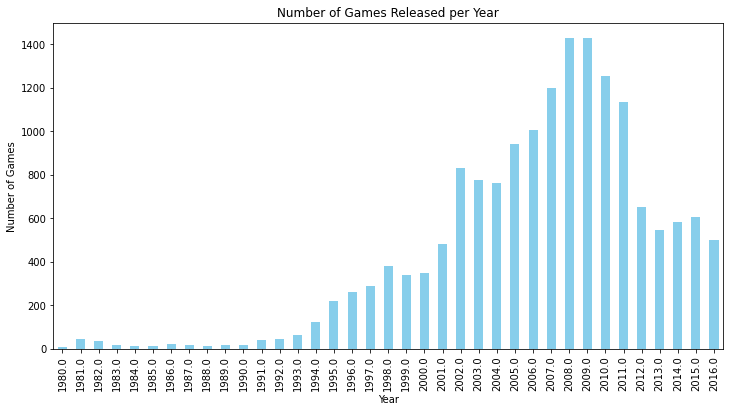

In [28]:
# Create a bar graph of the number of games for each year
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

### Evaluate how sales varied from platform to platform.

**All Platform Sales**

In [29]:
# Determine total sales for all platforms
all_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Print the all platforms and their total sales
print(all_platforms)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


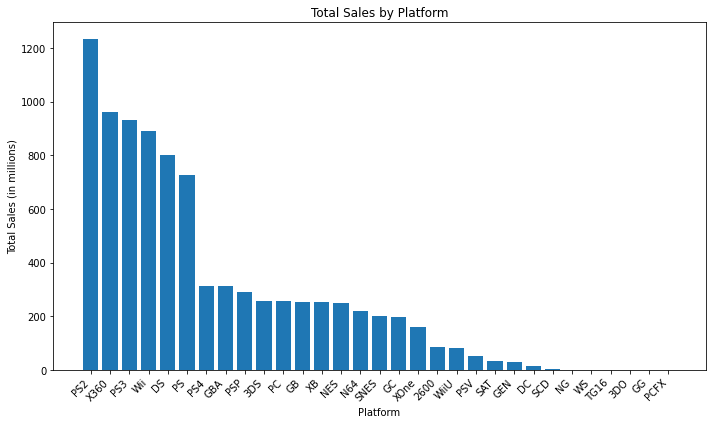

In [30]:
# Extract platform names and total sales from all_platforms
platforms = all_platforms.index
sales = all_platforms.values

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(platforms, sales)
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**Top Performing Platforms**

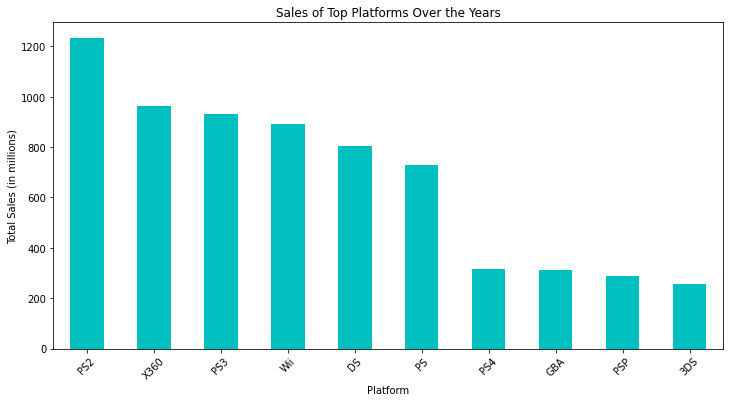

In [31]:
# Get the top 10 platforms by total sales
top_platforms = all_platforms.nlargest(10)

# Create a bar graph to visualize the total sales for the top platforms
plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='c')
plt.title('Sales of Top Platforms Over the Years')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

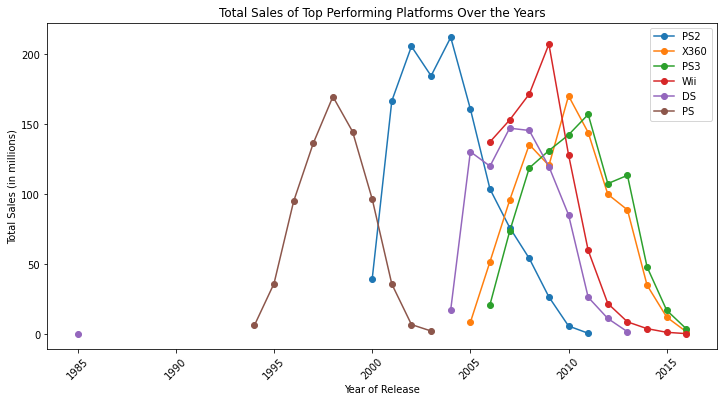

In [32]:
# List of the top-performing platforms
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Filter the data to include only the top-performing platforms
top_data = df[df['platform'].isin(top_platforms)]

# Group the data by 'Year_of_Release' and 'Platform' and calculate the total sales for top platforms
sales_by_year_top = top_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a line plot to visualize the total sales for the top performing platforms over the years
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt.plot(sales_by_year_top.index, sales_by_year_top[platform], label=platform, linestyle='-', marker='o')

plt.title('Total Sales of Top Performing Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

**Least Performing Platforms**

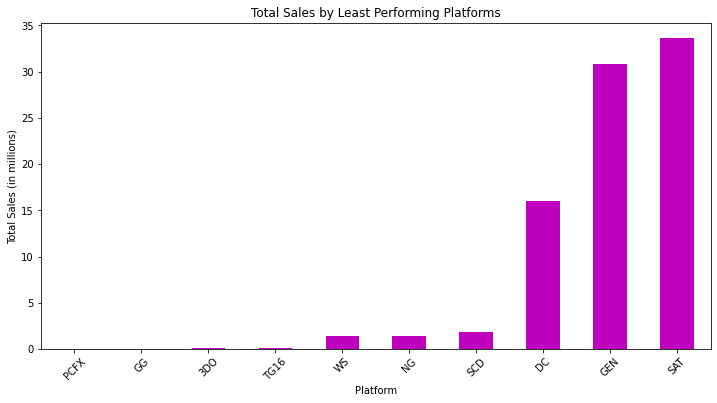

In [33]:
# Get the least performing platforms by total sales
least_performing_platforms = all_platforms.nsmallest(10)

# Create a bar graph to visualize the total sales for the least performing platforms
plt.figure(figsize=(12, 6))
least_performing_platforms.plot(kind='bar', color='m')
plt.title('Total Sales by Least Performing Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

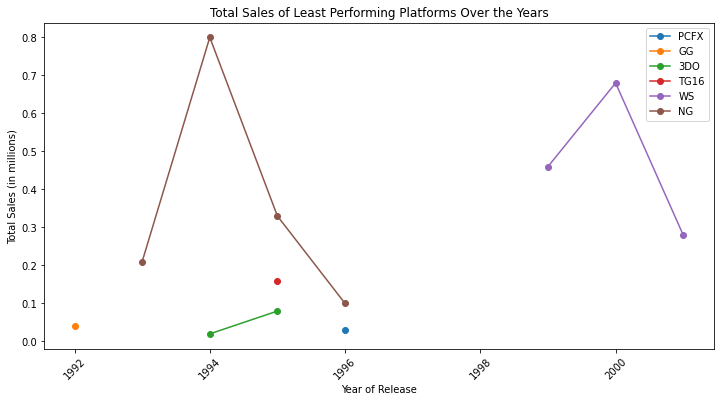

In [34]:
# List of the least-performing platforms
least_performing_platforms = ['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG']

# Filter the data to include only the least-performing platforms
least_data = df[df['platform'].isin(least_performing_platforms)]

# Group the data by 'Year_of_Release' and 'Platform' and calculate the total sales for least performing platforms
sales_by_year_least = least_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a line plot to visualize the total sales for the least performing platforms over the years
plt.figure(figsize=(12, 6))
for platform in least_performing_platforms:
    plt.plot(sales_by_year_least.index, sales_by_year_least[platform], label=platform, linestyle='-', marker='o')

plt.title('Total Sales of Least Performing Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Evaluate platforms that used to be popular but now have zero sales

In [35]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Most current data for `year_of_release` is 2016
current_data = df.query("year_of_release == year_of_release.max()") 
print("2016 Data")
display(current_data.head()) 

2016 Data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [36]:
# The total sale for each unique platform in 2016
print("Total Platforms Sales for 2016")
current_platform_totalsales = current_data.groupby("platform")["total_sales"].agg(sum)   
display(current_platform_totalsales.sort_values(ascending=False))

Total Platforms Sales for 2016


platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

In [37]:
# With the current data which top platform still appears in 2016, and which one does not    
vanished_platforms = (set(current_platform_totalsales.index).intersection(top_platforms).symmetric_difference(top_platforms))

# Top platforms that now have zero sales
print("Top platforms: ", top_platforms)
print("Top platforms now with zero sales: ", vanished_platforms)

Top platforms:  ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
Top platforms now with zero sales:  {'PS2', 'PS', 'DS'}


In [38]:
# Define the platforms
vanished_platforms_two = ['DS', 'PS2', 'PS']

for platform in vanished_platforms_two:
    # Filter the data for the specified platform and years (2000-2016)
    filtered_data = df[(df['platform'] == platform) & (df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2016)]

    # Group the filtered data by year and calculate the total sales
    sales_by_year = filtered_data.groupby('year_of_release')['total_sales'].sum()

    # The years (2000-2016)
    years = range(2000, 2017)  # Adjusted to include 2016

    print(f"Platform: {platform}")
    print(sales_by_year)

Platform: DS
year_of_release
2004.0     17.27
2005.0    130.14
2006.0    119.81
2007.0    146.94
2008.0    145.31
2009.0    119.54
2010.0     85.02
2011.0     26.18
2012.0     11.01
2013.0      1.54
Name: total_sales, dtype: float64
Platform: PS2
year_of_release
2000.0     39.17
2001.0    166.43
2002.0    205.38
2003.0    184.31
2004.0    211.81
2005.0    160.66
2006.0    103.42
2007.0     75.99
2008.0     53.90
2009.0     26.40
2010.0      5.64
2011.0      0.45
Name: total_sales, dtype: float64
Platform: PS
year_of_release
2000.0    96.37
2001.0    35.59
2002.0     6.67
2003.0     2.07
Name: total_sales, dtype: float64


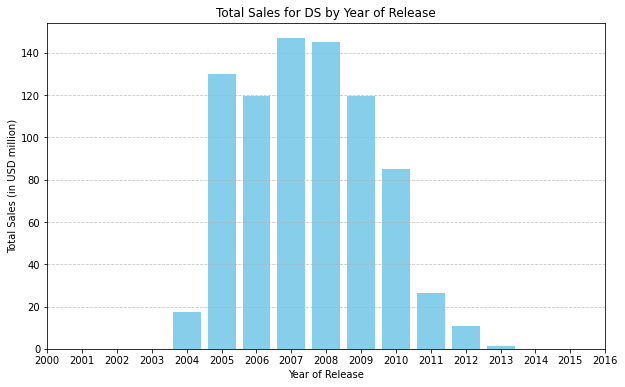

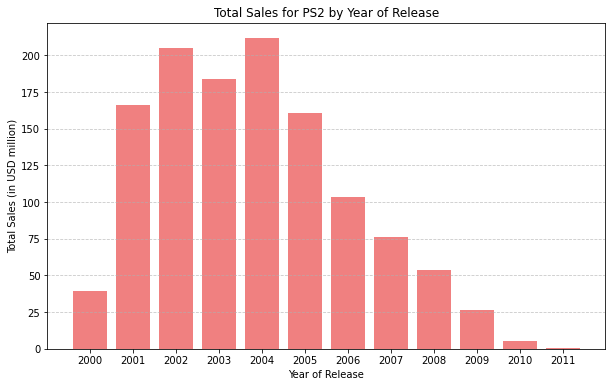

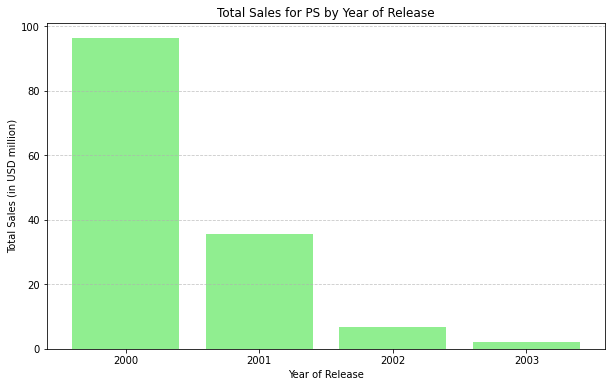

In [39]:
#bar graph for DS
years_ds = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
total_sales_ds = [17.27, 130.14, 119.81, 146.94, 145.31, 119.54, 85.02, 26.18, 11.01, 1.54]

plt.figure(figsize=(10, 6))
plt.bar(years_ds, total_sales_ds, color='skyblue')
plt.title('Total Sales for DS by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in USD million)')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#bar graph for PS2
years_ps2 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
total_sales_ps2 = [39.17, 166.43, 205.38, 184.31, 211.81, 160.66, 103.42, 75.99, 53.90, 26.40, 5.64, 0.45]

plt.figure(figsize=(10, 6))
plt.bar(years_ps2, total_sales_ps2, color='lightcoral')
plt.title('Total Sales for PS2 by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in USD million)')
plt.xticks(years_ps2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#bar graph for PS
years_ps = [2000, 2001, 2002, 2003]
total_sales_ps = [96.37, 35.59, 6.67, 2.07]

plt.figure(figsize=(10, 6))
plt.bar(years_ps, total_sales_ps, color='lightgreen')
plt.title('Total Sales for PS by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in USD million)')
plt.xticks(years_ps)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Reasons for Decline:**

The reason for the decline in these three platforms could be due to them being discontinued and a new version of the platform being introduced and therefore taking the new market share.

### Evaluate the general time it take for new platforms to appear and old ones to fade

For this part of the data we will need to separate the groups in terms of old platforms and new platforms and then get the averages for both. For the purpose of this data we will select the year 2000 as the separator year.

In [40]:
# Group the data by platform and find the first year of release for each platform
first_appearance = df.groupby('platform')['year_of_release'].min()

# Identify older platforms based on the year 2000
old_platforms = first_appearance[first_appearance < 2000].index

# Identify newer platforms based on the year 2000
new_platforms = first_appearance[first_appearance >= 2000].index

# Select data for platforms considered as "old platforms"
old_platform_data = df[df['platform'].isin(old_platforms)]

# Select data for platforms considered as "new platforms"
new_platform_data = df[df['platform'].isin(new_platforms)]

# Get the last year each platform released a game.
old_platform_max_year = old_platform_data.groupby("platform")["year_of_release"].max()

# Get the first year each new platform released a game.
new_platform_min_year = new_platform_data.groupby("platform")["year_of_release"].min()

# Filter years higher than 2000 then substract to get the platform that still produces game after 2000,  and then get the mean year difference
average_fade_time = (old_platform_max_year[old_platform_max_year > 2000] - 2000).mean()

# Filter years higher than 2000 then subtract to get the mean year difference
average_appearance_time = (new_platform_min_year[new_platform_min_year > 2000] - 2000).mean()

# Print the results
print(f"Average time for older platforms to fade: {average_fade_time} years")
print(f"Average time for new platforms to appear: {average_appearance_time} years")

Average time for older platforms to fade: 6.285714285714286 years
Average time for new platforms to appear: 8.2 years


**Gaming Life cycles**

On average it take approximately 6.29 years for older platforms to fade and 8.2 years for new platforms to appear. 

### Determine what period you should take data for.

Selecting data between 2000 to 2016 based on the latest active platforms

### New Dataframe for relevant data

In [41]:
# Filter the data to include records labeled as "new" in the 'platform_group' column
df_new = df.query("year_of_release >= 2013") 

# Display the filtered DataFrame
display(df_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [42]:
# print the general/summary information about the DataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


### Platform Sales

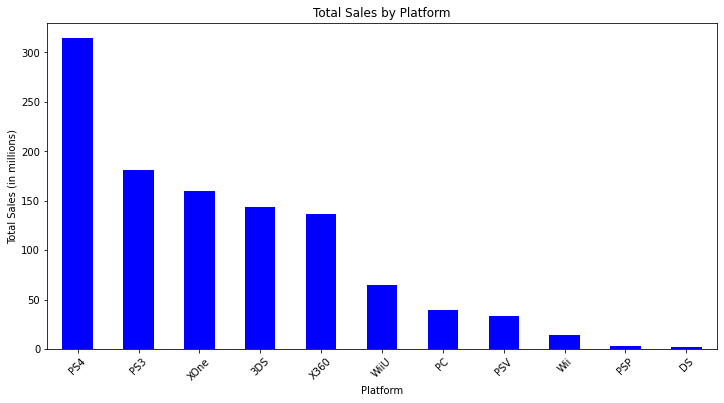

In [43]:
# Group the data by 'Platform' and calculate the total sales
platform_sales_new = df_new.groupby('platform')['total_sales'].sum()

# Sort the platforms by total sales in descending order
sorted_platforms = platform_sales_new.sort_values(ascending=False)

# Create a bar graph to visualize total sales for platforms
plt.figure(figsize=(12, 6))
sorted_platforms.plot(kind='bar', color='b')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Determine total sales for all platforms in new dataframe
all_platforms_new = df_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Print the all platforms and their total sales
print(all_platforms_new)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


**The platforms below are leading in sales.**

In [45]:
# Get the top 10 platforms by total sales
top_platforms_new = sorted_platforms.head(5)

# Create a Pandas DataFrame for the top 10 platforms
top_platforms_table = pd.DataFrame({'Platform': top_platforms_new.index, 'Total Sales (millions)': top_platforms_new.values})

# Display the table
top_platforms_table

,Platform,Total Sales (millions)
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


**The platforms below shrinking.**

In [46]:
# Get the platforms with the least total sales
least_platforms_new = platform_sales_new.nsmallest(5)

# Create a Pandas DataFrame for the least performing platforms
least_platforms_table = pd.DataFrame({'Platform': least_platforms_new.index, 'Total Sales (millions)': least_platforms_new.values})

# Display the table
least_platforms_table

,Platform,Total Sales (millions)
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.43


### A box plot for the global sales of all games, broken down by platform

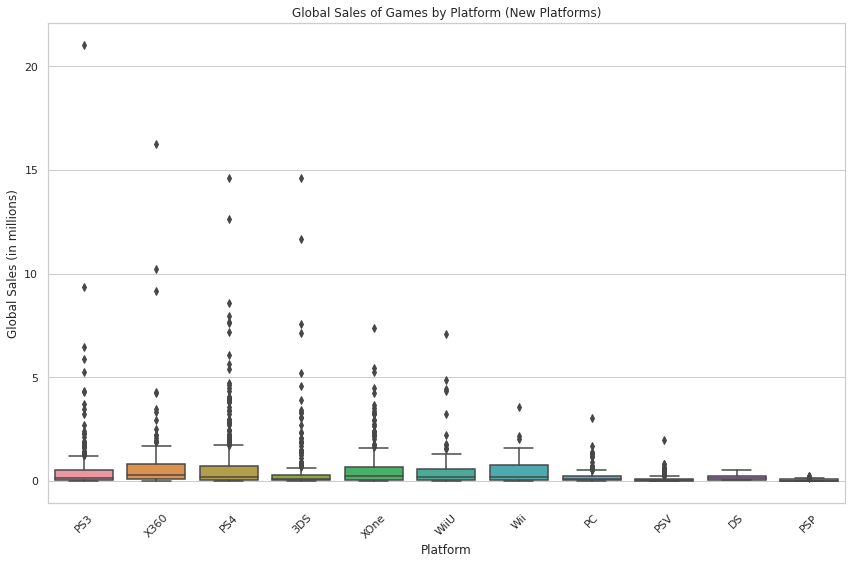

In [47]:
# Create a box plot for global sales broken down by platform
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='platform', y='total_sales', data=df_new)
plt.title('Global Sales of Games by Platform (New Platforms)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

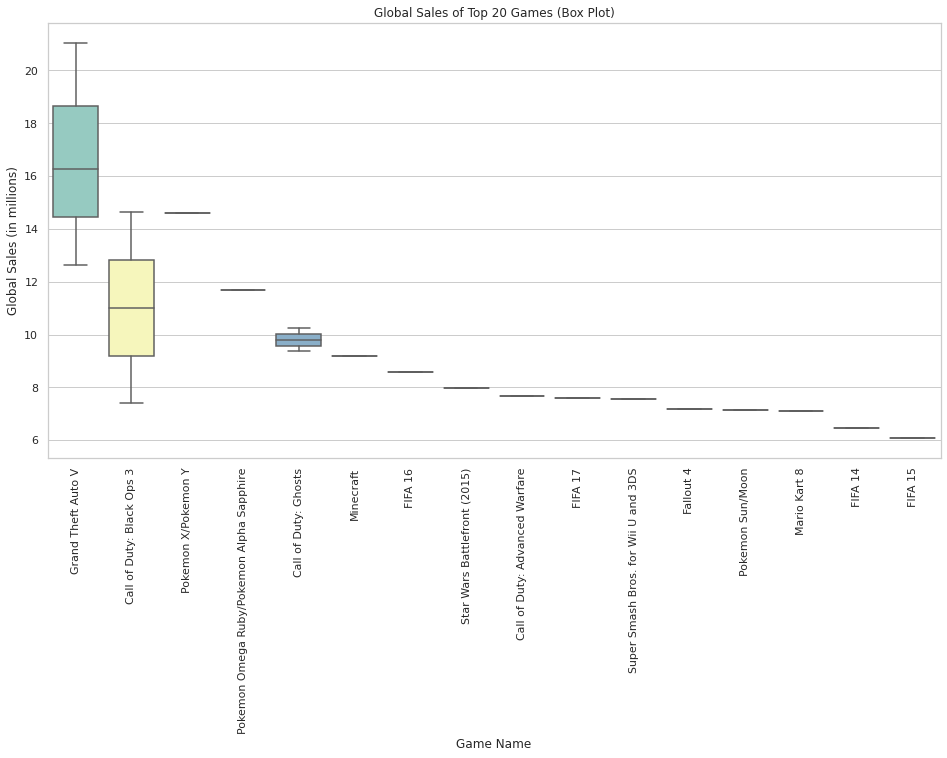

In [48]:
# Create a box plot for global sales of the top 20 games
top_20_games = df_new.nlargest(20, 'total_sales')
plt.figure(figsize=(16, 8))
sns.boxplot(x='name', y='total_sales', data=top_20_games, palette='Set3')
plt.title('Global Sales of Top 20 Games (Box Plot)')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

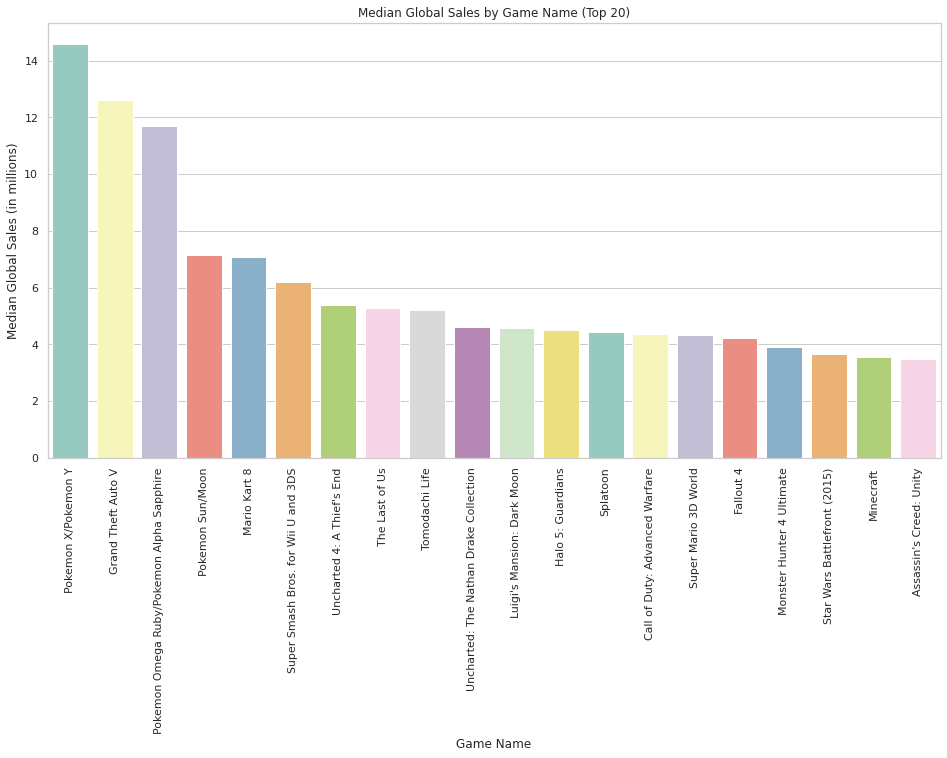

In [49]:
# Calculate the median sales for each game
median_sales_by_game = df_new.groupby('name')['total_sales'].median().sort_values(ascending=False)

# Create a bar plot for median sales by game name
plt.figure(figsize=(16, 8))
sns.barplot(x=median_sales_by_game.index[:20], y=median_sales_by_game.values[:20], palette='Set3')
plt.title('Median Global Sales by Game Name (Top 20)')
plt.xlabel('Game Name')
plt.ylabel('Median Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

### How user and professional reviews affect sales for one popular platform.


**Platform selected:XOne**  

In [50]:
# Filter the data for the platform XOne
xone_data = df_new[df_new['platform'] == 'XOne']

# Display the data in a table
xone_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


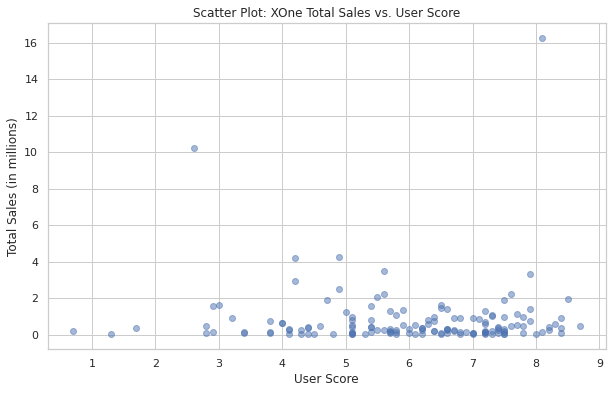

In [51]:
# Filter the data for the "XOne" platform
xone_data = df_new[df_new['platform'] == 'X360']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(xone_data['user_score'], xone_data['total_sales'], alpha=0.5)
plt.title('Scatter Plot: XOne Total Sales vs. User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

**Correlation between the User Score and Total Sales for XOne**

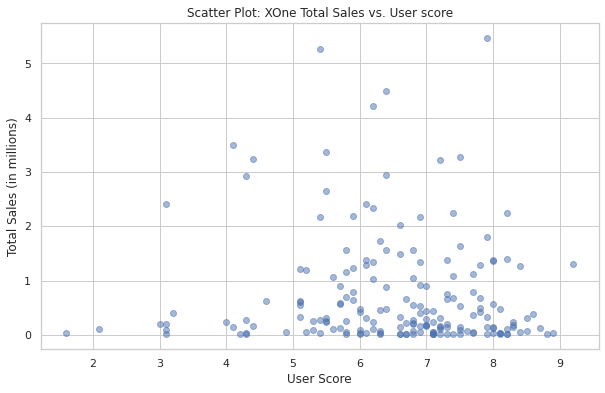

In [52]:
# Filter the data for the "XOne" platform
xone_data = df_new[df_new['platform'] == 'XOne']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(xone_data['user_score'], xone_data['total_sales'], alpha=0.5)
plt.title('Scatter Plot: XOne Total Sales vs. User score')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

In [53]:
# Calculate the correlation between User Score and Total Sales for X360
correlation_user = xone_data['user_score'].corr(xone_data['total_sales'])

print("Correlation between the User Score and Total Sales for XOne:", correlation_user)

Correlation between the User Score and Total Sales for XOne: -0.06892505328279414


**Correlation between the Critic Score and Total Sales for XOne**

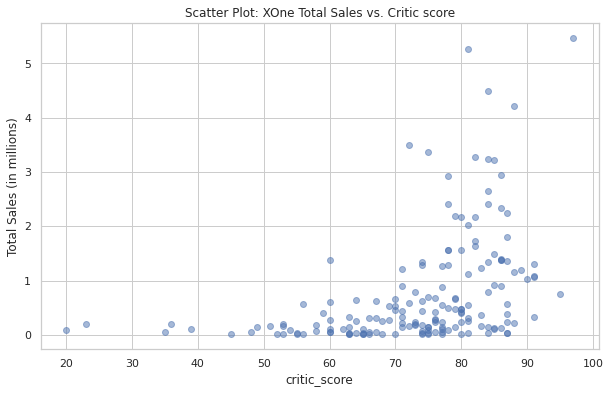

In [54]:
# Filter the data for the "XOne" platform
xone_data = df_new[df_new['platform'] == 'XOne']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(xone_data['critic_score'], xone_data['total_sales'], alpha=0.5)
plt.title('Scatter Plot: XOne Total Sales vs. Critic score')
plt.xlabel('critic_score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

In [55]:
# Calculate the correlation between Critic Score and Total Sales for X360
correlation_critic = xone_data['critic_score'].corr(xone_data['total_sales'])

print("Correlation between the Critic Score and Total Sales for XOne:", correlation_critic)

Correlation between the Critic Score and Total Sales for XOne: 0.4169983280084017


#### Conclusions
 
- The Correlation between the User Score and Total Sales for XOne is **-0.06892505328279414**
- The Correlation between the Critic Score and Total Sales for XOne is **0.4169983280084017**

There is a stronger corrolation between the Critic Score and Total Sales for XOne than there is for the User Score and Total Sales for XOne. However correlation for the Critic Score and Total Sales for XOne is not stong enough to conclude that the Critic Score has the greatest inpact on the Total Sales.

### Comparison of the sales of the same games on other platforms

In [56]:
#Print count the list of games
print(df_new['name'].count())

2233


In [57]:
#Print the list of games
print(df_new['name'].sum())

Grand Theft Auto VGrand Theft Auto VCall of Duty: Black Ops 3Pokemon X/Pokemon YGrand Theft Auto VPokemon Omega Ruby/Pokemon Alpha SapphireCall of Duty: GhostsCall of Duty: GhostsMinecraftFIFA 16Star Wars Battlefront (2015)Call of Duty: Advanced WarfareFIFA 17Super Smash Bros. for Wii U and 3DSCall of Duty: Black Ops 3Fallout 4Pokemon Sun/MoonMario Kart 8FIFA 14FIFA 15The Last of UsDestinyGrand Theft Auto VUncharted 4: A Thief's EndCall of Duty: Advanced WarfareMinecraftTomodachi LifeSuper Smash Bros. for Wii U and 3DSThe Last of UsUncharted: The Nathan Drake CollectionLuigi's Mansion: Dark MoonHalo 5: GuardiansCall of Duty: Infinite WarfareSplatoonCall of Duty: Advanced WarfareSuper Mario 3D WorldMinecraftCall of Duty: Advanced WarfareFIFA 15Fallout 4FIFA 14Battlefield 1Watch DogsFar Cry 4The Witcher 3: Wild HuntAssassin's Creed: UnityBatman: Arkham KnightMonster Hunter 4 UltimateNBA 2K16Call of Duty: GhostsTom Clancy's The DivisionAssassin's Creed IV: Black FlagStar Wars Battlefront 

In [58]:
# Get the top 10 game names with the highest total sales
top_10_games = df_new.nlargest(10, 'total_sales')['name']

# Display the top 10 games by sales
print(top_10_games)

16                           Grand Theft Auto V
23                           Grand Theft Auto V
31                    Call of Duty: Black Ops 3
33                          Pokemon X/Pokemon Y
42                           Grand Theft Auto V
47    Pokemon Omega Ruby/Pokemon Alpha Sapphire
60                         Call of Duty: Ghosts
69                         Call of Duty: Ghosts
72                                    Minecraft
77                                      FIFA 16
Name: name, dtype: object


In [59]:
#select 5 games 
game_titles = ['Pokemon X/Pokemon Y', 'FIFA 16', 'Minecraft', 'Call of Duty: Ghosts', 'Grand Theft Auto V']

# Create a loop to analyze sales for each game
for title in game_titles:
    # Filter the data for the current game on different platforms
    game_data = df_new[df_new['name'] == title]
    
    # Calculate and display the total sales for the current game on different platforms
    total_sales_by_platform = game_data.groupby('platform')['total_sales'].sum()
    
    print(f"Total Sales for {title} on Different Platforms:")
    print(total_sales_by_platform)
    print()

Total Sales for Pokemon X/Pokemon Y on Different Platforms:
platform
3DS    14.6
Name: total_sales, dtype: float64

Total Sales for FIFA 16 on Different Platforms:
platform
PC      0.20
PS3     2.70
PS4     8.58
X360    1.57
XOne    3.25
Name: total_sales, dtype: float64

Total Sales for Minecraft on Different Platforms:
platform
PS3     5.27
PS4     4.32
PSV     1.96
WiiU    0.67
X360    9.18
XOne    2.76
Name: total_sales, dtype: float64

Total Sales for Call of Duty: Ghosts on Different Platforms:
platform
PC       0.69
PS3      9.36
PS4      3.83
WiiU     0.35
X360    10.24
XOne     2.92
Name: total_sales, dtype: float64

Total Sales for Grand Theft Auto V on Different Platforms:
platform
PC       1.17
PS3     21.05
PS4     12.62
X360    16.27
XOne     5.47
Name: total_sales, dtype: float64



### The general distribution of games by genre

In [60]:
#Reload the dataframe
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [61]:
df_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [62]:
# Group the data by 'genre' and calculate the sum of total sales for each genre
genre_sales = df_new.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the sum sales for each genre
print(genre_sales)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


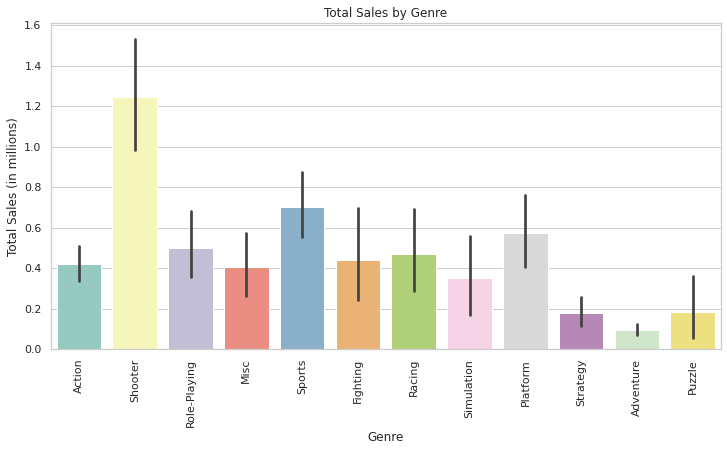

In [63]:
# Create a bar plot to compare 'genre' with total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='total_sales', data=df_new, palette='Set3')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

**The 3 top performing game genres** 

- Action     
- Sports    
- Shooter  

**The 3 leasy performing game genres**

- Adventure
- Puzzle
- Strategy   

## Create a user profile for each region

### Regions (NA, EU, JP)
- NA_sales (North American sales in USD million) 
- EU_sales (sales in Europe in USD million) 
- JP_sales (sales in Japan in USD million) 

**Total sales by region**

In [64]:
# Calculate the sum of sales in all regions
total_na_sales = df_new['na_sales'].sum()
total_eu_sales = df_new['eu_sales'].sum()
total_jp_sales = df_new['jp_sales'].sum()

# Display the total sales for all regions
print("Total North America sales:", total_na_sales)
print("Total Europe sales:", total_eu_sales)
print("Total Japan sales:", total_jp_sales)

Total North America sales: 437.71
Total Europe sales: 392.23
Total Japan sales: 140.78000000000003


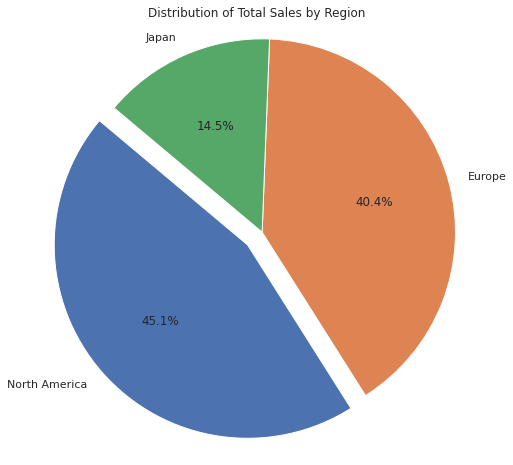

In [65]:
# Total sales data
total_sales = [total_na_sales, total_eu_sales, total_jp_sales]

# Labels for the regions
regions = ['North America', 'Europe', 'Japan']

# Explode a slice if needed
explode = (0.1, 0, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=regions, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Total Sales by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

**The top five platforms.**

In [66]:
# Define the sales columns
sales_columns = ['na_sales', 'eu_sales', 'jp_sales']

# Loop through the sales columns
for sales_column in sales_columns:
    # Group the data by platform and calculate the total sales for each platform in the current sales category
    platform_sales = df_new.groupby('platform')[sales_column].sum().reset_index()
    
    # Sort the platforms by total sales in descending order and get the top 5
    top_5_platforms_sales = platform_sales.nlargest(5, sales_column)
    
    # Convert platform names to lowercase
    top_5_platforms_sales['platform'] = top_5_platforms_sales['platform'].str.lower()
    
    # Display the top 5 platforms by sales in the current category
    print(f"Top 5 Platforms by {sales_column} Sales (in USD million):")
    print(top_5_platforms_sales)
    print()

Top 5 Platforms by na_sales Sales (in USD million):
   platform  na_sales
4       ps4    108.74
10     xone     93.12
9      x360     81.66
3       ps3     63.50
0       3ds     38.20

Top 5 Platforms by eu_sales Sales (in USD million):
   platform  eu_sales
4       ps4    141.09
3       ps3     67.81
10     xone     51.59
9      x360     42.52
0       3ds     30.96

Top 5 Platforms by jp_sales Sales (in USD million):
  platform  jp_sales
0      3ds     67.81
3      ps3     23.35
6      psv     18.59
4      ps4     15.96
8     wiiu     10.88



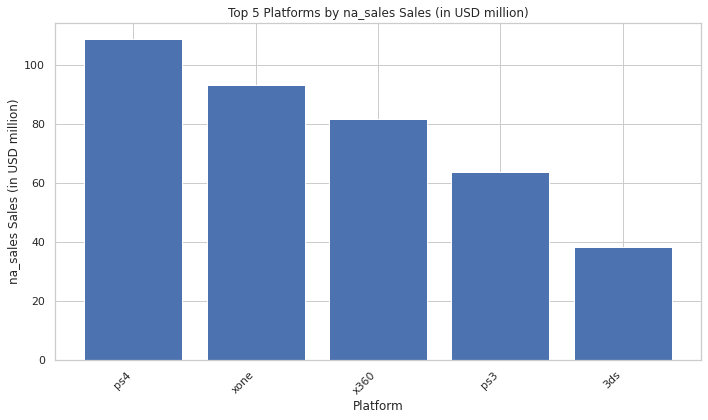

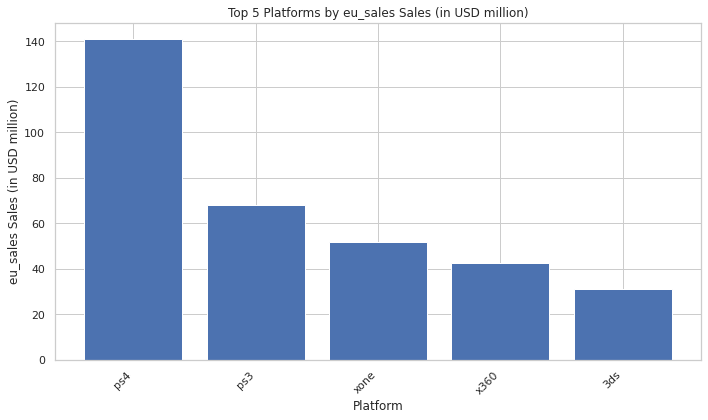

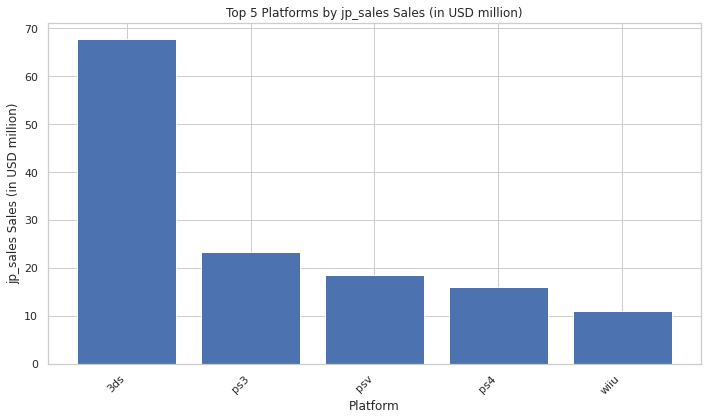

In [67]:
# Define the sales columns
sales_columns = ['na_sales', 'eu_sales', 'jp_sales']

# Loop through the sales columns
for sales_column in sales_columns:
    # Group the data by platform and calculate the total sales for each platform in the current sales category
    platform_sales = df_new.groupby('platform')[sales_column].sum().reset_index()
    
    # Sort the platforms by total sales in descending order and get the top 5
    top_5_platforms_sales = platform_sales.nlargest(5, sales_column)
    
    # Convert platform names to lowercase
    top_5_platforms_sales['platform'] = top_5_platforms_sales['platform'].str.lower()
    
    # Create a bar chart for the top 5 platforms by sales
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_platforms_sales['platform'], top_5_platforms_sales[sales_column])
    plt.title(f'Top 5 Platforms by {sales_column} Sales (in USD million)')
    plt.xlabel('Platform')
    plt.ylabel(f'{sales_column} Sales (in USD million)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**The top five genres.**

In [68]:
# Define the sales columns
sales_columns = ['na_sales', 'eu_sales', 'jp_sales']

# Loop through the sales columns
for sales_column in sales_columns:
    # Group the data by genre and calculate the total sales for each genre in the current sales category
    genre_sales = df_new.groupby('genre')[sales_column].sum().reset_index()
    
    # Sort the genres by total sales in descending order and get the top 5
    top_5_genres_sales = genre_sales.nlargest(5, sales_column)
   
    # Display the top 5 genres by sales in the current category
    print(f"Top 5 Genres by {sales_column} Sales (in USD million):")
    print(top_5_genres_sales)
    print()

Top 5 Genres by na_sales Sales (in USD million):
           genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49

Top 5 Genres by eu_sales Sales (in USD million):
           genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19

Top 5 Genres by jp_sales Sales (in USD million):
          genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61



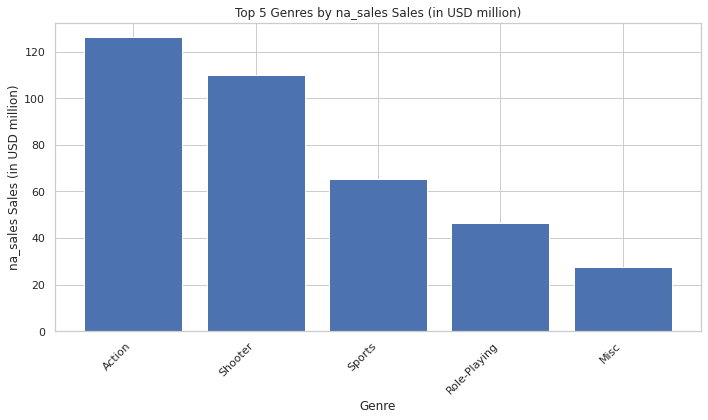

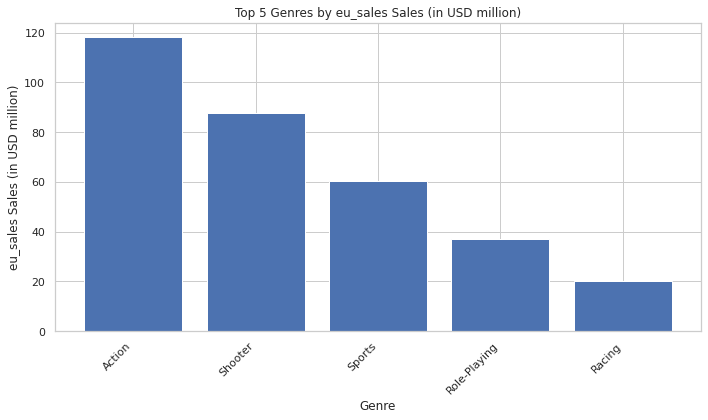

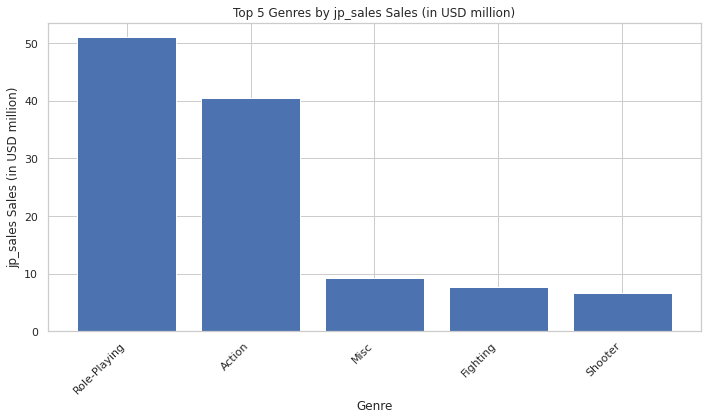

In [69]:
# Define the sales columns
sales_columns = ['na_sales', 'eu_sales', 'jp_sales']

# Loop through the sales columns
for sales_column in sales_columns:
    # Group the data by genre and calculate the total sales for each genre in the current sales category
    genre_sales = df_new.groupby('genre')[sales_column].sum().reset_index()
    
    # Sort the genres by total sales in descending order and get the top 5
    top_5_genres_sales = genre_sales.nlargest(5, sales_column)
    
    # Create a bar chart for the top 5 genres by sales in the current category
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_genres_sales['genre'], top_5_genres_sales[sales_column])
    plt.title(f'Top 5 Genres by {sales_column} Sales (in USD million)')
    plt.xlabel('Genre')
    plt.ylabel(f'{sales_column} Sales (in USD million)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Do ESRB ratings affect sales in individual regions?

In [70]:
print(df_new['rating'].unique())

['M' 'unknown' 'E' 'T' 'E10+']


In [71]:
# Group the data by rating and calculate the total sales for each rating category
rating_sales = df_new.groupby('rating')['total_sales'].sum().reset_index()

# Sort the ratings by total sales in descending order
rating_sales = rating_sales.sort_values(by='total_sales', ascending=False)

# Display the total sales for each rating category
print(rating_sales)

    rating  total_sales
2        M       371.68
4  unknown       276.84
0        E       200.16
3        T       126.62
1     E10+       115.39


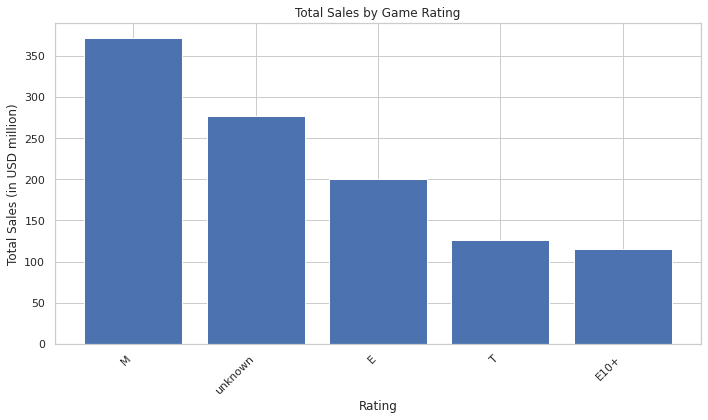

In [72]:
# Group the data by rating and calculate the total sales for each rating category
rating_sales = df_new.groupby('rating')['total_sales'].sum().reset_index()

# Sort the ratings by total sales in descending order
rating_sales = rating_sales.sort_values(by='total_sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rating_sales['rating'], rating_sales['total_sales'])
plt.title('Total Sales by Game Rating')
plt.xlabel('Rating')
plt.ylabel('Total Sales (in USD million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Top 3 sales per rating:**

- E (Everyone)
    - caters to a broad market hence higher sales
- M (Mature)
    - many adult play alot of video games hence higher sales
- T (Teen)
    - Teens tend to play alot of video games hence higher sales parobably grow to enter the mature market 

**Lowest 3 sales per rating:**

- AO (Adults Only)
    - very limited sales due to their restrictive nature.
- EC (Early Childhood)
    - very young audience and have a limited market
- RP (Rating Pending)
    - because the the rating is unknown it is also restrictive to younger audiances

## Test the hypotheses

**The statistical test**

The statistical test goes about testing which hypothesis is true or which applies to the dataset

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups or populations. 

For a two-sample t-test. This test calculates a t-statistic and a p-value to help you decide whether to reject the null hypothesis.

**T-Statistic:** 
- The t-statistic is a measure of the difference between the means of two groups
- relative to the variation within each group


**P-Value:** 
- The p-value is the probability of obtaining results
- assuming that the null hypothesis is true. 

**The Alpha Value (Significance Level)**

Is the probability of obtaioning a particular value. 

- often denoted as α, 
- is the chosen threshold that determines the level of significance in a hypothesis test
- It represents the maximum acceptable probability of making a Type I error (rejection of  the null hypothesis)
- Common alpha values include 0.05 (5%) or 0.01 (1%) 

A smaller p-value suggests stronger evidence against the null hypothesis. in the case above the p-value is less than the T-statistic this then rejects the Null Hypothesis (H0).

Concluding that the Alternative Hypothesis (H1)is true - the average revenue from users of the Ultimate and Surf plans differs.

**Formulation of the null and alternative hypotheses** 

Formulated based on the Two-Sample T-Test as two population group are being tested against each other.

**Average user ratings of the Xbox One and PC platforms are the same**

**The Hypothesis**

- Null Hypothesis (H0): Average user ratings of the Xbox One and PC platforms are the same.
- Alternative Hypothesis (H1): Average user ratings of the Xbox One and PC platforms differs.

In [73]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [74]:
# Remove rows with NaN values in the 'user_score' column
df_new_score = df_new.dropna(subset=['user_score'])

# Print dataframe
df_new_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


In [75]:
unique_names = sorted(df_new_score['platform'].unique())
print(unique_names)

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


In [76]:
average_rate_xboxone = df_new_score.loc[df_new_score['platform'] == 'XOne', 'user_score'].mean()
print("Average user ratings for the XOne:", average_rate_xboxone)

average_rate_pc = df_new_score.loc[df_new_score['platform'] == 'PC', 'user_score'].mean()
print("Average user ratings for the PC:", average_rate_pc)

Average user ratings for the XOne: 6.521428571428572
Average user ratings for the PC: 6.2696774193548395


In [77]:
var_rate_xboxone = df_new_score.loc[df_new_score['platform'] == 'XOne', 'user_score'].var()
print("Variance user ratings for the XOne:", var_rate_xboxone)

var_rate_pc = df_new_score.loc[df_new_score['platform'] == 'PC', 'user_score'].var()
print("Variance user ratings for the PC:", var_rate_pc)

Variance user ratings for the XOne: 1.9069968429360695
Variance user ratings for the PC: 3.035892752408882


In [78]:
alpha = 0.05

# # Filter data for user ratings of Xbox One and PC
sample_1 = df_new_score[df_new_score['platform'].str.contains('XOne', case=False)]['user_score']
sample_2 = df_new_score[df_new_score['platform'].str.contains('PC', case=False)]['user_score']

# Perform the t-test
t_stat, p_value = st.ttest_ind(sample_1,sample_2, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

T-statistic: 1.45192815744488
P-value: 0.14759594013430463
We can't reject the null hypothesis


**The Hypothesis**

- Null Hypothesis (H0): Average user ratings for the Action and Sports genres are the same.
- Alternative Hypothesis (H1): Average user ratings for the Action and Sports genres are different.

In [79]:
average_rate_action = df_new_score.loc[df_new_score['genre'] == 'Action', 'user_score'].mean()
print("Average user ratings for the genre - Action:", average_rate_action)

average_rate_sports = df_new_score.loc[df_new_score['genre'] == 'Sports', 'user_score'].mean()
print("Average user ratings for the genre - Sports:", average_rate_sports)

Average user ratings for the genre - Action: 6.837532133676092
Average user ratings for the genre - Sports: 5.238124999999999


In [80]:
var_rate_action = df_new_score.loc[df_new_score['genre'] == 'Action', 'user_score'].var()
print("Variance user ratings for the genre - Action:", var_rate_action)

var_rate_sports = df_new_score.loc[df_new_score['genre'] == 'Sports', 'user_score'].var()
print("Variance user ratings for the genre - Sports:", var_rate_sports)

Variance user ratings for the genre - Action: 1.7693609042482705
Variance user ratings for the genre - Sports: 3.180612814465409


In [81]:
alpha = 0.05

# Filter data for user ratings of the 'Action' and 'Sports' genres
sample_3 = df_new_score[df_new_score['genre'].str.contains('Action', case=False)]['user_score']
sample_4 = df_new_score[df_new_score['genre'].str.contains('Sports', case=False)]['user_score']

# Perform the t-test
t_stat, p_value = st.ttest_ind(sample_3, sample_4, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

T-statistic: 10.233428417448625
P-value: 1.4460039700704315e-20
We reject the null hypothesis


## Write a general conclusion

**Project Puropse**: Identifing patterns that determine whether a game succeeds or not.

The factors that affect a games sales and therefore its success
- **Platform**
    - PS2: 1233.56 million USD
    - X360: 961.24 million USD
    - PS3: 931.34 million USD

The platform which a game is produced makes the biggest difference in terms of the success of the game the more popular the platform the more successful the games produced on said platform.

- **Genre**
    - Action: 1526.16 million USD
    - Sports: 1130.92 million USD
    - Shooter: 912.70 million USD

The second most influential factor when it comes to the sales of games, certain genres do better than other genres and when a game falls within that genre the game tends to have more sales.


- **Location**
    - Total North America sales: 3529.61 million USD
    - Total Europe sales: 2085.61 million USD
    - Total Japan sales: 815.82 million USD

The location of the game does have an impact on the sales of the game. Games that are sold in North America have a much higher market than those which are sold in Europe and Japan.

- **ESRB Rating** (ESRB - The Entertainment Software Rating Board evaluation)
    - E (Everyone): 2359.16 million USD
    - M (Mature): 1432.35 million USD
    - T (Teen): 1381.78 million USD

ESRB Ratings are yet another factor that have an influence on game success specifically games that cater for everyone have a higher success rate than any other any other game rating.

The above factors have the most influence in the success of a game.